# $A_{1u}-S$ Junction



## Probability density

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

data = np.load("../Variables/Hoti/A1u_S_junction.npz")
probability_density_2D = data["probability_density_2D"]
t_J = data["t_J"]
Phi = data["Phi"]
phi_energy = data["phi_energy"]
Phi_values = data["Phi_values"]
spin = data["spin"]
L_x = data["L_x"]
L_y = data["L_y"]

<IPython.core.display.Javascript object>


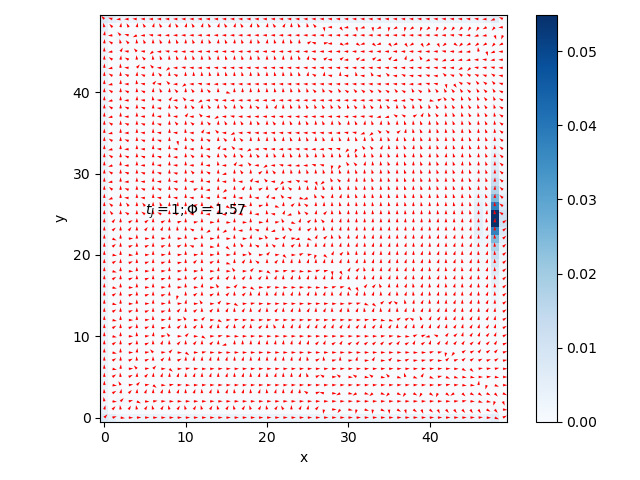

In [15]:
fig, ax = plt.subplots()
image = ax.imshow(probability_density_2D, cmap="Blues", origin="lower")
plt.colorbar(image)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.text(5,25, rf'$t_J={t_J}; \Phi={np.round(Phi, 2)}$')
x, y = np.meshgrid(np.linspace(0, L_x-1, L_x), 
                    np.linspace(0, L_y-1, L_y))

# Directional vectors
u = spin[:, :, 0]   #x component
v = spin[:, :, 1]   #y component

# Plotting Vector Field with QUIVER
ax.quiver(x, y, u, v, color='r')
plt.tight_layout()

# Zero modes vs $\phi$

<IPython.core.display.Javascript object>


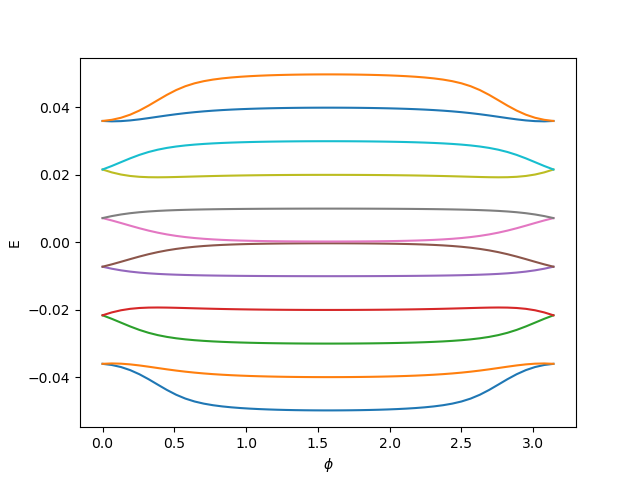

In [11]:
fig, ax = plt.subplots()
ax.plot(Phi_values, phi_energy)
ax.set_xlabel(r"$\phi$")
ax.set_ylabel("E");

## Spin in z

<IPython.core.display.Javascript object>


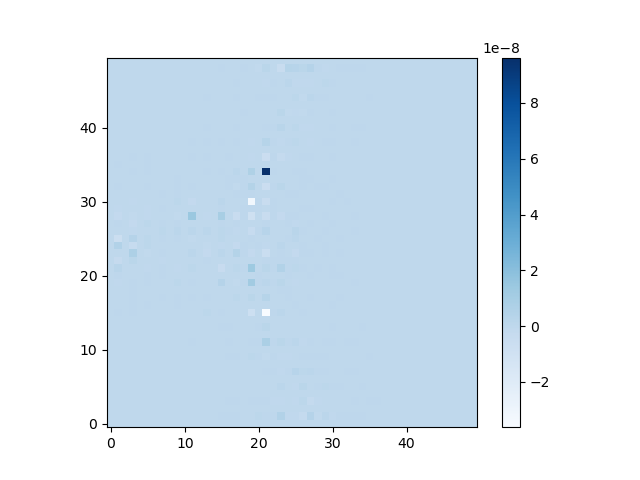

In [17]:
fig, ax = plt.subplots()
image = ax.imshow(spin[:,:,2], cmap="Blues", origin="lower")
plt.colorbar(image);

SyntaxError: invalid syntax (1039120451.py, line 1)